In [1]:
import xarray as xr
import earthaccess
import boto3
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import warnings
from IPython.display import display, Markdown
import numpy as np

warnings.filterwarnings('ignore')
%matplotlib inline

/home/vince/miniconda3/envs/545/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
if (boto3.client('s3').meta.region_name == 'us-west-2'):
    display(Markdown('### us-west-2 Region Check: &#x2705;'))
else:
    display(Markdown('### us-west-2 Region Check: &#10060;'))
    raise ValueError('Your notebook is not running inside the AWS us-west-2 region, and will not be able to directly access NASA Earthdata S')

### us-west-2 Region Check: &#x2705;

In [3]:
# Authenticate using Earthdata Login prerequisite files
auth = earthaccess.login()

From GES-DISC web search (https://disc.gsfc.nasa.gov):

All data available from 1980 to Present

Need to Calculate PM2.5 from a formula

PM2.5 Hourly: C1276812830-GES_DISC, s3://gesdisc-cumulus-prod-protected/MERRA2/M2T1NXAER.5.12.4/

    - https://disc.gsfc.nasa.gov/datasets/M2T1NXAER_5.12.4/summary

PM2.5 Monthly : C1276812866-GES_DISC, s3://gesdisc-cumulus-prod-protected/MERRA2_MONTHLY/M2TMNXAER.5.12.4/

    - https://disc.gsfc.nasa.gov/datasets/M2TMNXAER_5.12.4/summary

PM2.5 Monthly (Hourly Average): C1276812869-GES_DISC, s3://gesdisc-cumulus-prod-protected/MERRA2_DIURNAL/M2TUNXAER.5.12.4/

    - https://disc.gsfc.nasa.gov/datasets/M2TUNXAER_5.12.4/summary

MERRA2_CNN_HAQAST bias corrected global hourly surface total PM2.5 mass concentration, V1 (MERRA2_CNN_HAQAST_PM25): C3094710982-GES_DISC, s3://gesdisc-cumulus-prod-protected/HAQAST/MERRA2_CNN_HAQAST_PM25.1/

    - https://disc.gsfc.nasa.gov/datasets/MERRA2_CNN_HAQAST_PM25_1/summary
    - 2000-01-01 to  2024-06-01

In [4]:
# Search for the granule by DOI
results = earthaccess.search_data(
 concept_id="C3094710982-GES_DISC", temporal=("2023-08-18", "2023-08-18"))

print(results)

[Collection: {'ShortName': 'MERRA2_CNN_HAQAST_PM25', 'Version': '1'}
Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'BoundingRectangles': [{'WestBoundingCoordinate': -180.0, 'EastBoundingCoordinate': 179.375, 'NorthBoundingCoordinate': 90.0, 'SouthBoundingCoordinate': -90.0}]}}}
Temporal coverage: {'RangeDateTime': {'BeginningDateTime': '2023-08-18T00:00:00.000Z', 'EndingDateTime': '2023-08-18T23:59:59.000Z'}}
Size(MB): 11.9504432678223
Data: ['https://data.gesdisc.earthdata.nasa.gov/data/HAQAST/MERRA2_CNN_HAQAST_PM25.1/2023/MERRA2_HAQAST_CNN_L4_V1.20230818.nc4']]


In [5]:
fn = earthaccess.open(results)

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
ds = xr.open_mfdataset(fn)

In [7]:
type(ds)

xarray.core.dataset.Dataset

In [8]:
ds.attrs

{'Comment': 'filename: MERRA2_HAQAST_CNN_L4_V1_20230818.nc4',
 'Filename': 'MERRA2_HAQAST_CNN_L4_V1_20230818.nc4',
 'Conventions': 'CF-1',
 'Institution': 'NASA Goddard Space Flight Center',
 'References': 'http://gmao.gsfc.nasa.gov ; https://doi.org/10.4209/aaqr.210105 ; https://doi.org/10.1029/2022EA002375',
 'Format': 'NetCDF-4/HDF-5',
 'SpatialCoverage': 'global',
 'VersionID': 'V1',
 'TemporalRange': '2000-01-01 -> 2024-12-31',
 'identifier_product_doi_authority': 'http://dx.doi.org/',
 'ShortName': 'MERRA2_CNN_HAQAST_PM25',
 'GranuleID': 'MERRA2_HAQAST_CNN_L4_V1_20230818.nc4',
 'ProductionDateTime': '2024-03-19T22:11:52.617632Z',
 'LongName': 'MERRA2_CNN_HAQAST bias corrected global hourly surface total PM2.5 mass concentration V1.0',
 'title': 'MERRA2_CNN_HAQAST bias corrected global hourly surface total PM2.5 mass concentration V1.0',
 'SouthernmostLatitude': '-90.0',
 'NorthernmostLatitude': '90.0',
 'WesternmostLongitude': '-180.0',
 'EasternmostLongitude': '179.375',
 'Latit

In [9]:
ds.dims

FrozenMappingWarningOnValuesAccess({'time': 24, 'lat': 361, 'lon': 576})

In [10]:
ds.values

<bound method Mapping.values of <xarray.Dataset> Size: 22MB
Dimensions:                  (time: 24, lat: 361, lon: 576)
Coordinates:
  * time                     (time) datetime64[ns] 192B 2023-08-18T00:30:00 ....
  * lat                      (lat) float32 1kB -90.0 -89.5 -89.0 ... 89.5 90.0
  * lon                      (lon) float32 2kB -180.0 -179.4 ... 178.8 179.4
Data variables:
    MERRA2_CNN_Surface_PM25  (time, lat, lon) float32 20MB dask.array<chunksize=(1, 361, 576), meta=np.ndarray>
    QFLAG                    (lat, lon) float64 2MB dask.array<chunksize=(361, 576), meta=np.ndarray>
Attributes: (12/33)
    Comment:                           filename: MERRA2_HAQAST_CNN_L4_V1_2023...
    Filename:                          MERRA2_HAQAST_CNN_L4_V1_20230818.nc4
    Conventions:                       CF-1
    Institution:                       NASA Goddard Space Flight Center
    References:                        http://gmao.gsfc.nasa.gov ; https://do...
    Format:               

In [11]:
ds.variables

Frozen({'time': <xarray.IndexVariable 'time' (time: 24)> Size: 192B
array(['2023-08-18T00:30:00.000000000', '2023-08-18T01:30:00.000000000',
       '2023-08-18T02:30:00.000000000', '2023-08-18T03:30:00.000000000',
       '2023-08-18T04:30:00.000000000', '2023-08-18T05:30:00.000000000',
       '2023-08-18T06:30:00.000000000', '2023-08-18T07:30:00.000000000',
       '2023-08-18T08:30:00.000000000', '2023-08-18T09:30:00.000000000',
       '2023-08-18T10:30:00.000000000', '2023-08-18T11:30:00.000000000',
       '2023-08-18T12:30:00.000000000', '2023-08-18T13:30:00.000000000',
       '2023-08-18T14:30:00.000000000', '2023-08-18T15:30:00.000000000',
       '2023-08-18T16:30:00.000000000', '2023-08-18T17:30:00.000000000',
       '2023-08-18T18:30:00.000000000', '2023-08-18T19:30:00.000000000',
       '2023-08-18T20:30:00.000000000', '2023-08-18T21:30:00.000000000',
       '2023-08-18T22:30:00.000000000', '2023-08-18T23:30:00.000000000'],
      dtype='datetime64[ns]')
Attributes:
    long_name

In [12]:
ds

<xarray.Dataset> Size: 22MB
Dimensions:                  (time: 24, lat: 361, lon: 576)
Coordinates:
  * time                     (time) datetime64[ns] 192B 2023-08-18T00:30:00 ....
  * lat                      (lat) float32 1kB -90.0 -89.5 -89.0 ... 89.5 90.0
  * lon                      (lon) float32 2kB -180.0 -179.4 ... 178.8 179.4
Data variables:
    MERRA2_CNN_Surface_PM25  (time, lat, lon) float32 20MB dask.array<chunksize=(1, 361, 576), meta=np.ndarray>
    QFLAG                    (lat, lon) float64 2MB dask.array<chunksize=(361, 576), meta=np.ndarray>
Attributes: (12/33)
    Comment:                           filename: MERRA2_HAQAST_CNN_L4_V1_2023...
    Filename:                          MERRA2_HAQAST_CNN_L4_V1_20230818.nc4
    Conventions:                       CF-1
    Institution:                       NASA Goddard Space Flight Center
    References:                        http://gmao.gsfc.nasa.gov ; https://do...
    Format:                            NetCDF-4/HDF-5
    ...                                ...
    RangeEndingDate:                   2023-08-18
    RangeEndingTime:                   23:59:59.000000
    DODS_EXTRA.Unlimited_Dimension:    time
    history:                           2023-04-21 04:24:38 GMT Hyrax-1.16.3 h...
    ProcessingLevel:                   4
    MapProjection:                     Geographic lat/lon. Datum: WGS-84

In [13]:
ds.MERRA2_CNN_Surface_PM25

<xarray.DataArray 'MERRA2_CNN_Surface_PM25' (time: 24, lat: 361, lon: 576)> Size: 20MB
dask.array<open_dataset-MERRA2_CNN_Surface_PM25, shape=(24, 361, 576), dtype=float32, chunksize=(1, 361, 576), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 192B 2023-08-18T00:30:00 ... 2023-08-18T23...
  * lat      (lat) float32 1kB -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5 90.0
  * lon      (lon) float32 2kB -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
Attributes:
    units:      ug m-3
    long_name:  Bias corrected surface total PM2.5 mass concentration

In [14]:
pm25 = ds.MERRA2_CNN_Surface_PM25[0, :, :].values
pm25

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

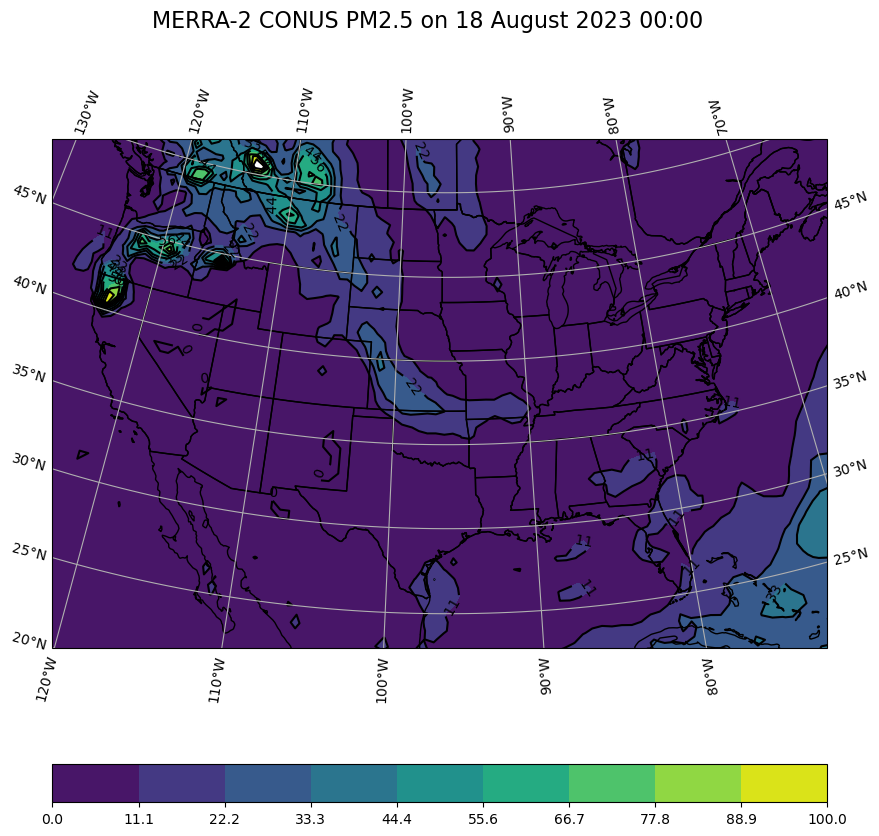

In [15]:
plt.rcParams['figure.figsize'] = 10,10

# Set up figure
fig = plt.figure()

ax = fig.add_subplot(111, projection=ccrs.LambertConformal())
ax.set_extent([-121, -72, 23, 51], crs=ccrs.PlateCarree()) # CONUS extent
ax.coastlines(resolution='50m')
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES)

# Set up filled and line contours
filled_c = ax.contourf(ds.lon, ds.lat, pm25, levels=np.linspace(0,100,10), 
                       transform=ccrs.PlateCarree())
line_c = ax.contour(ds.lon, ds.lat, pm25, levels=np.linspace(0,100,10),
                        colors=['black'],
                        transform=ccrs.PlateCarree())

# Lat/lon grid lines
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# Set up labelling for contours
ax.clabel(line_c,  
    colors=['black'],
    manual=False,  
    inline=True,  
    fmt=' {:.0f} '.format,)

# Set up colorbar and figure title
fig.colorbar(filled_c, orientation='horizontal')
fig.suptitle('MERRA-2 CONUS PM2.5 on 18 August 2023 00:00', fontsize=16)

plt.show()

# Set up colorbar and figure title
fig.colorbar(filled_c, orientation='horizontal')
fig.suptitle('MERRA-2 CONUS PM2.5 on 18 August 2023 00:00', fontsize=16)

plt.show()